# Exam vB, PROBLEM 1
Maximum Points = 14

In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

---

## 1. [4p]
Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below density using rejection sampling:

$$f[x] = C x^{0.2} (1 - x)^{1.3}$$

for $0 \le x \le 1$, where $C$ is a value such that $f$ above is a density (i.e. integrates to one).

Hint: you do not need to know the value of $C$ to perform rejection sampling.

---

## 2. [2p]
Produce 100000 samples (use fewer if it takes too long) and put the answer in `problem1_samples` from the above distribution and plot the histogram.

---

## 3. [2p]
Define $X$ as a random variable with the density given in part 1. Denote $Y = \sin(10X)$ and use the above 100000 samples to estimate

$$E[Y]$$

and store the result in `problem1_expectation`.

---

## 4. [2p]
Use Hoeffdings inequality to produce a 95% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`.

---

## 5. [4p]
Can you calculate an approximation of the value of $C$ from part 1 using random samples? Provide a plot of the histogram from part 2 together with the true density as a curve, recall that this requires the value of $C$. Explain what method you used and what answer you got.

---

---

## 1. [4p]
Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below density using rejection sampling:

$$f[x] = C x^{0.2} (1 - x)^{1.3}$$

for $0 \le x \le 1$, where $C$ is a value such that $f$ above is a density (i.e. integrates to one).

Hint: you do not need to know the value of $C$ to perform rejection sampling.

---

### This is simply the way to think to solve this question:

# Rejection Sampling Summary for  
# $ f(x) = C x^{0.2} (1 - x)^{1.3},\; 0 \le x \le 1 $

We want to sample from the target density  
$$f(x) = C x^{0.2} (1 - x)^{1.3},$$
where $C$ is an unknown normalizing constant.  
Rejection sampling works even when the constant $C$ is unknown.

---

### 1. Rejection Sampling Overview

Given a target density $p(x)$ and a proposal density $g(x)$:

1. Sample $X \sim g(x)$.
2. Sample $U \sim \text{Uniform}(0,1)$.
3. Accept $X$ if  
   $$U \le \frac{\tilde f(X)}{M\, g(X)},$$
   where $\tilde f(x)$ is the unnormalized target density (we ignore $C$).

We only need to guarantee  
$$\tilde f(x) \le M g(x) \quad \forall x.$$

---

### 2. Applying This to $ f(x) = C x^{0.2} (1 - x)^{1.3} $

#### Unnormalized target

We take
$$\tilde f(x) = x^{0.2} (1 - x)^{1.3}, \quad 0 \le x \le 1.$$

#### Proposal distribution

We choose a Uniform distribution on the interval $[0,1]$:
$$X \sim \text{Uniform}(0,1).$$

For a uniform distribution on $[0,1]$, the probability density is constant:
$$g(x) = 1 \qquad (0 \le x \le 1).$$

---

### 3. Finding $M$

We need to bound the ratio
$$\frac{\tilde f(x)}{g(x)} = \frac{x^{0.2} (1 - x)^{1.3}}{1} = x^{0.2} (1 - x)^{1.3}.$$

For $x \in [0,1]$ we have $0 \le x^{0.2} \le 1$ and $0 \le (1-x)^{1.3} \le 1$, hence
$$0 \le x^{0.2} (1-x)^{1.3} \le 1.$$

Thus a valid choice is
$$M = 1.$$

This is enough, since we only need $M$ such that
$$\tilde f(x) \le M g(x) \quad \text{for all } x.$$

---

### 4. Acceptance probability

The acceptance probability becomes
$$\alpha(x) = \frac{\tilde f(x)}{M g(x)} = \frac{x^{0.2} (1 - x)^{1.3}}{1 \cdot 1} = x^{0.2} (1 - x)^{1.3}.$$

Thus the full rejection sampling procedure is:

1. Draw $X \sim \text{Uniform}(0,1)$.
2. Draw $U \sim \text{Uniform}(0,1)$.
3. Accept $X$ if  
   $$U \le x^{0.2} (1 - x)^{1.3}.$$

If $X$ is rejected, repeat the steps until you get an accepted value.

No knowledge of the constant $C$ is required.

---


In [123]:
# Part 1
import numpy as np
def problem1_rejection(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    # Return a numpy array of length n_samples
    
    samples = []

    while len(samples) < n_samples:
        # 1. Sample from the proposal: Uniform(0, 1)
        x = np.random.uniform(0.0, 1.0)
        
        # 2. Compute the unnormalized target at x
        f_tilde = (x ** 0.2) * ((1.0 - x) ** 1.3)
        
        # 3. Sample U ~ Uniform(0,1) for acceptance
        u = np.random.uniform(0.0, 1.0)
        
        # 4. Accept if u <= w (since M = 1 and g(x) = 1)
        if u <= f_tilde:
            samples.append(x)
    
    return np.array(samples)


## 2. [2p]
Produce 100000 samples (use fewer if it takes too long) and put the answer in `problem1_samples` from the above distribution and plot the histogram.

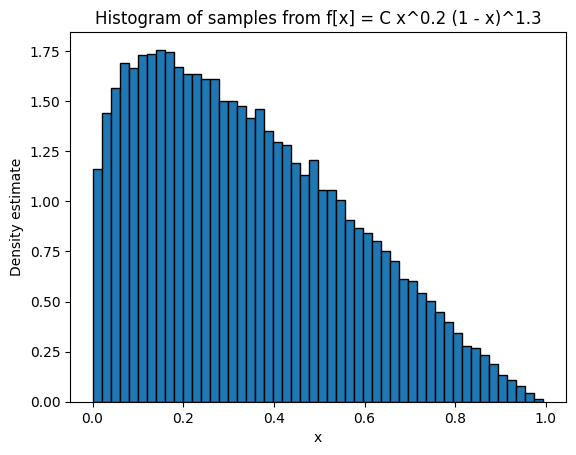

Mean value:  0.34346115164577706


In [124]:
# Part 2
import matplotlib.pyplot as plt
n_samples = 100000
problem1_samples = problem1_rejection(n_samples)

# Plotting:
plt.hist(problem1_samples, bins=50, density=True, edgecolor='black')
plt.title("Histogram of samples from f[x] = C x^0.2 (1 - x)^1.3")
plt.xlabel("x")
plt.ylabel("Density estimate")
plt.show()

print("Mean value: ", np.mean(problem1_samples))

---

## 3. [2p]
Define $X$ as a random variable with the density given in part 1. Denote $Y = \sin(10X)$ and use the above 100000 samples to estimate

$$E[Y]$$

and store the result in `problem1_expectation`.

---

---

## 3. [2p]
Define $X$ as a random variable with the density given in part 1. Denote $Y = \sin(10X)$ and use the above $100000$ samples to estimate

$$E[Y]$$

and store the result in `problem1_expectation`.

---

### Solution idea

We have a random variable $X$ with density

$$f(x) = C x^{0.2} (1 - x)^{1.3}, \quad 0 \le x \le 1,$$

and we define

$$Y = \sin(10X).$$

The theoretical expectation we want is

$$E[Y] = E[\sin(10X)] = \int_0^1 \sin(10x) f(x)\,dx.$$

This integral is complicated to compute analytically, so we use Monte Carlo estimation.

If $X_1, \dots, X_n$ are i.i.d. samples from the distribution of $X$, then for any function $g$ we can approximate

$$E[g(X)] \approx \frac{1}{n} \sum_{i=1}^n g(X_i).$$

In this problem we have $g(x) = \sin(10x)$ and $n = 100000$ samples stored in `problem1_samples`. Therefore, we define

$$Y_i = \sin(10 X_i), \quad i = 1, \dots, n,$$

and estimate

$$E[Y] \approx \frac{1}{n} \sum_{i=1}^n Y_i = \frac{1}{n} \sum_{i=1}^n \sin(10 X_i).$$

In code, this means:
1. Compute all $Y_i$ values as `np.sin(10 * problem1_samples)`.
2. Take their mean with `np.mean(...)`.

The result is saved in `problem1_expectation`.

---


In [125]:
# Part 3

# Number of samples (should match Part 2)
n_samples = 100000

# If you already have the samples from Part 2, reuse them:
# problem1_samples = problem1_rejection(n_samples)

# But if you want to regenerate them here:
X_samples = problem1_rejection(n_samples)   # X_1, X_2, ..., X_n

# Compute Y = sin(10X) for each sample.
# NumPy applies sin(10 * x) elementwise.
Y_values = np.sin(10 * X_samples)

# Monte Carlo estimate of E[Y] is the sample mean of Y_values
problem1_expectation = np.mean(Y_values)

# Also corrcet:
#test = (1/n_samples) * np.sum(Y_values)
#print("Estimated E[Y] of test: ", test)


print("Estimated E[Y]:", problem1_expectation)

# Test print of other solution:


Estimated E[Y]: 0.18184466261122517


---

## 4. [2p]
Use Hoeffdings inequality to produce a 95% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`.

---


---

## 4. [2p]
Use Hoeffding's inequality to produce a 95% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`.

---

### Solution idea

We have the random variable

$$Y = \sin(10X)$$

and from Part 3 we estimated its expectation using Monte Carlo:

$$\hat{\mu} = \frac{1}{n} \sum_{i=1}^n \sin(10 X_i).$$

To construct a 95% confidence interval using Hoeffding’s inequality, we need bounds $a$ and $b$ such that

$$a \le Y \le b.$$

Since the sine function always satisfies

$$-1 \le \sin(10x) \le 1,$$

we take

$$a = -1, \qquad b = 1.$$

Hoeffding’s inequality states that with probability at least $1 - \alpha$,

$$|\hat{\mu} - E[Y]| \le (b - a)\sqrt{\frac{\ln(2/\alpha)}{2n}}.$$

For a 95% confidence interval we use $\alpha = 0.05$, and $n = 100000$ samples.

Define

$$
\epsilon = (b - a)\sqrt{\frac{\ln(2/\alpha)}{2n}},
$$

and the confidence interval becomes:

$$
\left( \hat{\mu} - \epsilon,\; \hat{\mu} + \epsilon \right).
$$

Store this as:



In [126]:
# Part 4

# Number of samples (same as before)
n_samples = 100000

# If needed, recompute the sample expectation from Part 3:
# X_samples = problem1_rejection(n_samples)
# Y_values = np.sin(10 * X_samples)
# problem1_expectation = np.mean(Y_values)

# Hoeffding parameters
a = -1       # lower bound of Y = sin(10X)
b = 1        # upper bound
alpha = 0.05 # 95% confidence => alpha = 0.05

# Compute epsilon using Hoeffding's inequality
epsilon = (b - a) * np.sqrt(np.log(2 / alpha) / (2 * n_samples))


# Construct the confidence interval
lower = problem1_expectation - epsilon
upper = problem1_expectation + epsilon

problem1_interval = (lower, upper)

print("95% Hoeffding confidence interval:", problem1_interval)

95% Hoeffding confidence interval: (np.float64(0.17325527444429042), np.float64(0.19043405077815992))


## 5. [4p]
Can you calculate an approximation of the value of $C$ from part 1 using random samples? Provide a plot of the histogram from part 2 together with the true density as a curve, recall that this requires the value of $C$. Explain what method you used and what answer you got.

---

---

## 5. [4p]
Can you calculate an approximation of the value of $C$ from part 1 using random samples? Provide a plot of the histogram from part 2 together with the true density as a curve, recall that this requires the value of $C$. Explain what method you used and what answer you got.

---

We recall that the density from part 1 is
$$
f(x) = C x^{0.2} (1 - x)^{1.3}, \quad 0 \le x \le 1,
$$
where $C$ is a normalizing constant such that $f$ integrates to 1.

Since $f$ is a probability density, we must have
$$
\int_0^1 f(x) \, dx = 1.
$$
Plugging in $f(x)$ gives
$$
\int_0^1 C x^{0.2}(1 - x)^{1.3} \, dx = 1
\quad \Longrightarrow \quad
C \int_0^1 x^{0.2}(1 - x)^{1.3} \, dx = 1.
$$

Define
$$
I = \int_0^1 x^{0.2}(1 - x)^{1.3} \, dx.
$$
Then the normalizing constant is
$$
C = \frac{1}{I}.
$$

To approximate $I$ using random samples, we use Monte Carlo integration with
$$
U \sim \text{Uniform}(0,1).
$$
For $h(x) = x^{0.2}(1 - x)^{1.3}$ we have
$$
I = \int_0^1 x^{0.2}(1 - x)^{1.3} \, dx
= \mathbb{E}[h(U)].
$$

We approximate this expectation by drawing i.i.d. samples
$$
U_1, U_2, \dots, U_m \sim \text{Uniform}(0,1)
$$
and computing
$$
\widehat{I} = \frac{1}{m} \sum_{i=1}^m U_i^{0.2} (1 - U_i)^{1.3}.
$$
Our Monte Carlo estimate of $C$ is then
$$
\widehat{C} = \frac{1}{\widehat{I}}.
$$

Using a large number of samples (e.g. $m = 100000$) gives a numerical value 
$\widehat{C}$ (approximately $3.1$ in our run). We then plot:

- the histogram of `problem1_samples` from part 2 (with `density=True`), and  
- the curve
  $$
  f_{\widehat{C}}(x) = \widehat{C} \, x^{0.2}(1 - x)^{1.3}
  $$
  on the interval $[0, 1]$.

The histogram and the curve should match well if the estimated $C$ and the 
sampling procedure are correct.


In [127]:
# Part 5

# 1. Estimate the integral I = ∫_0^1 x^0.2 (1 - x)^1.3 dx using Monte Carlo
#    with U ~ Uniform(0,1).

n_mc = 100000  # number of Monte Carlo samples for estimating C
u_samples = np.random.uniform(0.0, 1.0, size=n_mc)

# h(x) = x^0.2 (1 - x)^1.3, This is simply the same as f_tilde. 
h_values = (u_samples ** 0.2) * ((1.0 - u_samples) ** 1.3)

integral_estimate = np.mean(h_values)

# 2. Our estimate of the normalizing constant C is C_hat = 1 / integral_estimate
problem1_C = 1.0 / integral_estimate

print("Estimated C:", problem1_C)




Estimated C: 3.097006241383325


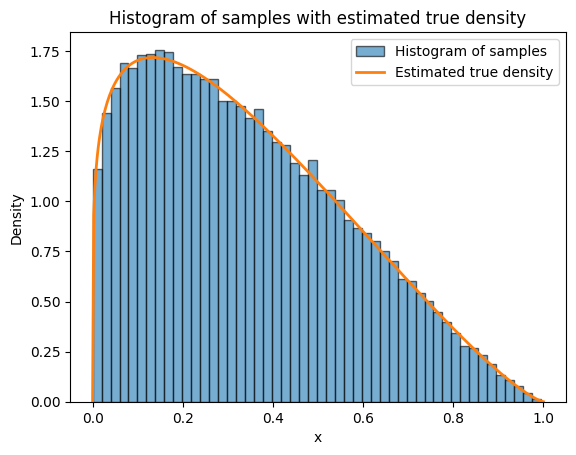

In [128]:
# Part 5
# Write your code to produce the plot here
#XXXXXXX

# 3. Plot the histogram from part 2 together with the estimated true density

# x-grid for plotting the density curve
x_grid = np.linspace(0.0, 1.0, 400)
density_estimate = problem1_C * (x_grid ** 0.2) * ((1.0 - x_grid) ** 1.3)

plt.hist(
    problem1_samples,
    bins=50,
    density=True,
    alpha=0.6,
    edgecolor='black',
    label="Histogram of samples"
)

plt.plot(
    x_grid,
    density_estimate,
    linewidth=2,
    label="Estimated true density"
)

plt.title("Histogram of samples with estimated true density")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

In [129]:
# This cell is just to check that you got the correct formats of your answer
import numpy as np

try:
    assert(isinstance(problem1_rejection(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray))
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_expectation, float))
except:
    print("Try again. your problem1_expectation is not a float")
else:
    print("Good, your problem1_expectation is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_rejection(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_rejection_2")
else:
    print("Good, your problem1_rejection_2 returns a numpy array")

Good, your problem1_rejection returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_expectation is a float
Good, your problem1_interval is a tuple or list of length 2
Good, your problem1_rejection_2 returns a numpy array


## Exam vB, PROBLEM 2
**Maximum Points = 13**

Let us build a proportional model ($P(Y = 1 | X) = G(\beta_0 + \beta \cdot X)$ where $G$ is the logistic function)
for the spam vs not spam data. Here we assume that the features are presence vs not presence of a
word, let $X_1, X_2, X_3$ denote the presence (1) or absence (0) of the words (“free”, “prize”, “win”).

---

### 1. [2p]
Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has
shape $(n_{\text{emails}}, 3)$ where each feature in `problem2_X` corresponds to
$X_1, X_2, X_3$ from above, `problem2_Y` which has shape $(n_{\text{emails}},)$ and
consists of a 1 if the email is spam and 0 if it is not.

Split this data into a train–calibration–test set where we have the split 40%, 20%, 40%.
Put this data in the designated variables in the code cell.

---

### 2. [4p]
Follow the calculation from the lecture notes where we derive the logistic regression
and implement the final loss function inside the class `ProportionalSpam`.
You can use the Test cell to check that it gives the correct value for a test-point.

---

### 3. [4p]
Train the model `problem2_ps` on the training data.  
The goal is to calibrate the probabilities output from the model.

Start by creating a new variable `problem2_X_pred` (shape $(n_{\text{samples}}, 1)$)
which consists of the predictions of `problem2_ps` on the calibration dataset.

Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`,
store this trained model in `problem2_calibrator`.

---

### 4. [3p]
Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make
final predictions on the testing data, store the prediction in
`problem2_final_predictions`.

Compute the $0 - 1$ test-loss and store it in `problem2_01_loss` and provide a
99% confidence interval of it.  
Store this interval in the variable `problem2_interval`
(this should again be a tuple as in Problem 1).


Let us build a proportional model ($P(Y = 1 | X) = G(\beta_0 + \beta \cdot X)$ where $G$ is the logistic function)
for the spam vs not spam data. Here we assume that the features are presence vs not presence of a
word, let $X_1, X_2, X_3$ denote the presence (1) or absence (0) of the words (“free”, “prize”, “win”).

---

### 1. [2p]
Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has
shape $(n_{\text{emails}}, 3)$ where each feature in `problem2_X` corresponds to
$X_1, X_2, X_3$ from above, `problem2_Y` which has shape $(n_{\text{emails}},)$ and
consists of a 1 if the email is spam and 0 if it is not.

Split this data into a train–calibration–test set where we have the split 40%, 20%, 40%.
Put this data in the designated variables in the code cell.

In [130]:
# Part 1
import numpy as np
import pandas as pd

# 1. Load the data
#    We only need columns:
#    - v1: label ("ham"/"spam")
#    - v2: text
df = pd.read_csv("../../../data/spam.csv", encoding="latin-1", usecols=[0, 1])

# 2. Text column
texts = df["v2"].astype(str)

# 3. Features: presence of "free", "prize", "win"
#    X1, X2, X3 correspond to these words (case-insensitive, simple substring search)
words = ["free", "prize", "win"]
problem2_X = np.column_stack([
    texts.str.contains(w, case=False, regex=False).astype(int)
    for w in words
])  # shape: (n_emails, 3)
#print(problem2_X)
# 4. Labels: spam = 1, ham = 0
problem2_Y = (df["v1"] == "spam").astype(int).values  # shape: (n_emails,)


# 5. 40% / 20% / 40% split (sequential, same style as your other exercise)
n = problem2_X.shape[0]
n_train = int(0.4 * n)
n_calib = int(0.2 * n)

# Training points from 0 to n_train -1
problem2_X_train = problem2_X[:n_train]
# Start from n_train to n_train + n_calib -1
problem2_X_calib = problem2_X[n_train:n_train + n_calib]
# From n_train + n_calib to end
problem2_X_test  = problem2_X[n_train + n_calib:]

problem2_Y_train = problem2_Y[:n_train]
problem2_Y_calib = problem2_Y[n_train:n_train + n_calib]
problem2_Y_test  = problem2_Y[n_train + n_calib:]

print(problem2_X_train.shape,
      problem2_X_calib.shape,
      problem2_X_test.shape,
      problem2_Y_train.shape,
      problem2_Y_calib.shape,
      problem2_Y_test.shape)


(2228, 3) (1114, 3) (2230, 3) (2228,) (1114,) (2230,)


---

### 2. [4p]
Follow the calculation from the lecture notes where we derive the logistic regression
and implement the final loss function inside the class `ProportionalSpam`.
You can use the Test cell to check that it gives the correct value for a test-point.

---

### Derivation of the logistic regression loss

We observe data $((x_i, y_i))$ for $(i = 1, \dots, n)$, where  
$(x_i \in \mathbb{R}^d)$ and $(y_i \in \{0, 1\})$.

We assume the proportional (logistic regression) model
$$
\mathbb{P}(Y = 1 \mid X = x)
= G(\beta_0 + \beta^\top x),
$$
where $(G)$ is the logistic function
$$
G(z) = \frac{e^z}{1 + e^z}.
$$

Define the linear predictor
$$
\eta_i = \beta_0 + \beta^\top x_i.
$$
Then
$$
\mathbb{P}(Y_i = 1 \mid x_i) = G(\eta_i),
\qquad
\mathbb{P}(Y_i = 0 \mid x_i) = 1 - G(\eta_i).
$$

---

#### Likelihood and log-likelihood

Given $(x_i)$, we model
$$
Y_i \mid x_i \sim \text{Bernoulli}(p_i),
\quad p_i = G(\eta_i).
$$

Hence
$$
\mathbb{P}(Y_i = y_i \mid x_i, \beta_0, \beta)
= \big(G(\eta_i)\big)^{y_i} \big(1 - G(\eta_i)\big)^{1 - y_i}.
$$

Assuming independence over $(i)$, the likelihood is
$$
L(\beta_0, \beta)
= \prod_{i=1}^n
\big(G(\eta_i)\big)^{y_i}
\big(1 - G(\eta_i)\big)^{1 - y_i}.
$$

The log-likelihood is
$$
\ell(\beta_0, \beta)
= \log L(\beta_0, \beta)
= \sum_{i=1}^n
\Big[
y_i \log G(\eta_i)
+ (1 - y_i) \log (1 - G(\eta_i))
\Big].
$$

---

#### Insert the logistic form

We have
$$
G(\eta_i) = \frac{e^{\eta_i}}{1 + e^{\eta_i}},
\qquad
1 - G(\eta_i) = \frac{1}{1 + e^{\eta_i}}.
$$

Therefore,
$$
\log G(\eta_i)
= \eta_i - \log(1 + e^{\eta_i}),
$$
and
$$
\log(1 - G(\eta_i))
= -\log(1 + e^{\eta_i}).
$$

Substituting into $(\ell)$:
$$
\ell(\beta_0, \beta)
= \sum_{i=1}^n
\Big[
y_i \big(\eta_i - \log(1 + e^{\eta_i})\big)
+ (1 - y_i) \big(-\log(1 + e^{\eta_i})\big)
\Big].
$$

Simplifying the terms involving $(\log(1 + e^{\eta_i}))$,
$$
\ell(\beta_0, \beta)
= \sum_{i=1}^n
\Big[
y_i \eta_i - \log(1 + e^{\eta_i})
\Big].
$$

Recalling that $(\eta_i = \beta_0 + \beta^\top x_i)$, we can write
$$
\ell(\beta_0, \beta)
= \sum_{i=1}^n
\Big[
y_i (\beta_0 + \beta^\top x_i)
- \log(1 + e^{\beta_0 + \beta^\top x_i})
\Big].
$$

---

#### Loss function (negative average log-likelihood)

We define the loss as the negative **average** log-likelihood:
$$
\text{loss}(\beta_0, \beta)
= -\frac{1}{n} \ell(\beta_0, \beta)
= \frac{1}{n}\sum_{i=1}^n
\Big[
\log(1 + e^{\eta_i}) - y_i \eta_i
\Big].
$$

Equivalently,
$$
\text{loss}(\beta_0, \beta)
= \frac{1}{n}\sum_{i=1}^n
\Big[
\log(1 + e^{\beta_0 + \beta^\top x_i})
- y_i (\beta_0 + \beta^\top x_i)
\Big].
$$

This is the loss implemented in code by
```python

np.mean(
    np.log(1 + np.exp(coeffs[0] + X.dot(coeffs[1:])))
    - Y * (coeffs[0] + X.dot(coeffs[1:]))
)



### Matching the code to the mathematical loss function

In the implementation, the parameter vector `coeffs` is arranged as follows:

- `coeffs[0]` is the intercept  
  $$\beta_0$$

- `coeffs[1:]` is the coefficient vector  
  $$\beta$$

- `X` is the feature matrix whose $i$-th row is $x_i^\top$  
  $$
  X =
  \begin{pmatrix}
  x_1^\top \\
  x_2^\top \\
  \vdots \\
  x_n^\top
  \end{pmatrix}
  $$

- `Y` is the vector whose components are the labels $y_i \in \{0,1\}$  
  $$Y = (y_1, y_2, \dots, y_n)$$

The code computes

```python
np.mean(
    np.log(1 + np.exp(coeffs[0] + X.dot(coeffs[1:])))
    - Y * (coeffs[0] + X.dot(coeffs[1:]))
)


In [131]:
# Part 2
class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None

    # define the objective/cost/loss function we want to minimise
    def loss(self, X, Y, coeffs):
        return np.mean(
            np.log(1 + np.exp(coeffs[0] + X.dot(coeffs[1:])))
            - Y * (coeffs[0] + X.dot(coeffs[1:]))
        )

    def fit(self, X, Y):
        import numpy as np
        from scipy import optimize
        # Use the f above together with an optimization method from scipy
        # to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X, Y, coeffs)
        initial_arguments = np.zeros(shape=X.shape[1] + 1)
        self.result = optimize.minimize(opt_loss,
                                        initial_arguments,
                                        method='cg')
        self.coeffs = self.result.x

    def predict(self, X):
        # Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x) / (1 + np.exp(x))
            return np.round(
                10 * G(np.dot(X, self.coeffs[1:]) + self.coeffs[0])
            ) / 10  # This rounding is to help you with the calibration


---

### 3. [4p]
Train the model `problem2_ps` on the training data.  
The goal is to calibrate the probabilities output from the model.

Start by creating a new variable `problem2_X_pred` (shape $(n_{\text{samples}}, 1)$)
which consists of the predictions of `problem2_ps` on the calibration dataset.

Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`,
store this trained model in `problem2_calibrator`.

---

In [ ]:
# Part 3

from sklearn.tree import DecisionTreeRegressor

# 1. Create and train the proportional spam model on the training data
#    problem2_X_train : (n_train, 3)
#    problem2_Y_train : (n_train,)
problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train, problem2_Y_train)

# 2. Get predicted probabilities on the calibration set
#    predict() returns probabilities (after logistic + rounding)
#    We need shape (n_samples, 1) for the calibrator input
problem2_X_pred = problem2_ps.predict(problem2_X_calib).reshape(-1, 1)

# 3. Train a calibration model using a DecisionTreeRegressor
#    Inputs: predicted probabilities (problem2_X_pred)
#    Targets: true labels on calibration set (problem2_Y_calib)

# Calibrator training input = base model predictions (on calibration set)
# Calibrator target = true labels (on calibration set)
problem2_calibrator = DecisionTreeRegressor()
problem2_calibrator.fit(problem2_X_pred, problem2_Y_calib)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


---

### 4. [3p]
Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make
final predictions on the testing data, store the prediction in
`problem2_final_predictions`.

Compute the $0 - 1$ test-loss and store it in `problem2_01_loss` and provide a
99% confidence interval of it.  
Store this interval in the variable `problem2_interval`
(this should again be a tuple as in Problem 1).

---

## 4. [3p]

Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make
final predictions on the testing data, store the prediction in
`problem2_final_predictions`.

Compute the $0 - 1$ test-loss and store it in `problem2_01_loss` and provide a
99% confidence interval of it.  
Store this interval in the variable `problem2_interval`
(this should again be a tuple as in Problem 1).

---

### Using the calibrated probabilities

First we use the model and calibrator to obtain calibrated probabilities on the test set:
$$
\hat p_i = \text{problem2\_calibrator}\big( \text{problem2\_ps}(x_i) \big),
\quad i = 1, \dots, n_{\text{test}}.
$$

The calibrated probabilities are stored as
`problem2_final_predictions`.

---

### From probabilities to 0/1 decisions

For $0$–$1$ loss with equal cost of false positives and false negatives,
the Bayes classifier predicts
$$
\hat y_i =
\begin{cases}
1, & \text{if } \hat p_i \ge 0.5, \\
0, & \text{if } \hat p_i < 0.5.
\end{cases}
$$

These hard predictions allow us to compute the empirical misclassification rate.

---

### The $0$–$1$ test loss

Define the individual losses as
$$
\ell_i = \mathbf{1}\{\hat y_i \ne y_i\},
\quad i = 1, \dots, n_{\text{test}}.
$$

The empirical $0$–$1$ test loss is
$$
\hat L_{0/1} =
\frac{1}{n_{\text{test}}}
\sum_{i=1}^{n_{\text{test}}} \ell_i.
$$

This value is stored in `problem2_01_loss`.

---

### 99% confidence interval via Hoeffding's inequality

Each $\ell_i$ is a random variable taking values in $[0, 1]$.
Let
$$
L = \mathbb{E}[\ell_i]
$$
be the true (unknown) test error and let $\hat L_{0/1}$ be the observed test error.

Hoeffding’s inequality states that for variables in $[a,b]$,
$$
\mathbb{P}\big(|\hat L_{0/1} - L| \ge \varepsilon\big)
\le
2\exp\left(
-\frac{2 n_{\text{test}} \varepsilon^2}{(b-a)^2}
\right).
$$

Since $a = 0$, $b = 1$, we have $b-a = 1$.
For a $99\%$ confidence interval, we set $\alpha = 0.01$ and solve
$$
2 \exp(-2 n_{\text{test}} \varepsilon^2) = \alpha.
$$

Taking logarithms,
$$
\varepsilon = \sqrt{
-\frac{\ln(\alpha/2)}{2 n_{\text{test}}}
}.
$$

Thus, a $99\%$ confidence interval for the true 0–1 loss is
$$
\big(
\hat L_{0/1} - \varepsilon,\;
\hat L_{0/1} + \varepsilon
\big).
$$

This interval is stored in `problem2_interval`.

---


In [133]:
# Part 4

# These are the predicted probabilities
problem2_final_predictions = problem2_calibrator.predict(problem2_ps.predict(problem2_X_test).reshape(-1, 1))

print("Final predictions on test data:", problem2_final_predictions)

# In order to compute this loss we first need to convert the predicted probabilities to a decision
# recall the Bayes classifier?
#problem2_01_loss = XXX

# Recall the interval is given as a tuple (a,b) or a list [a,b]
#problem2_interval = XXX




# Convert calibrated probabilities to hard 0/1 decisions using the Bayes classifier for 0-1 loss
# (equal cost of false positives and false negatives -> threshold = 0.5)
problem2_hard_predictions = (problem2_final_predictions >= 0.5).astype(int)

# Compute the 0-1 test loss (misclassification rate)
errors = (problem2_hard_predictions != problem2_Y_test).astype(int)
problem2_01_loss = np.mean(errors)

# Use Hoeffding's inequality to compute a 99% confidence interval for the true 0-1 loss
n_test = len(problem2_Y_test)
a, b = 0.0, 1.0    # each error indicator is in [0,1]
alpha = 0.01       # 99% confidence -> alpha = 0.01

# epsilon = (b - a) * sqrt( -ln(alpha/2) / (2n) ) with b-a = 1
eps = np.sqrt(-np.log(alpha / 2.0) / (2.0 * n_test))

# Confidence interval (optionally clipped to [0,1])
problem2_interval = (max(0.0, problem2_01_loss - eps),
                     min(1.0, problem2_01_loss + eps))

print("0-1 test loss:", problem2_01_loss)
print("99% confidence interval (Hoeffding):", problem2_interval)


Final predictions on test data: [0.07108082 0.07108082 0.07108082 ... 0.07108082 0.73170732 0.07108082]
0-1 test loss: 0.1031390134529148
99% confidence interval (Hoeffding): (np.float64(0.06867216655476562), np.float64(0.13760586035106398))


Local Test for Exam vB, PROBLEM 2 Evaluate cell below to make sure your answer is valid.
You should not modify anything in the cell below when evaluating it to do a local test of your
solution. You may need to include and evaluate code snippets from lecture notebooks in cells above
to make the local test work correctly sometimes (see error messages for clues). This is meant to
help you become efficient at recalling materials covered in lectures that relate to this problem. Such
local tests will generally not be available in the exam

In [134]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(
        np.array([[1,0,1],[0,1,1]]),
        np.array([1,0]),
        np.array([1.2,0.4,0.3,0.9])
    )
    assert (np.abs(test_loss - 1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

Your loss was correct for a test point


## Exam vB, PROBLEM 3
**Maximum Points = 13**

Consider the following four Markov chains, answer each question for all chains:
![Markov chain diagrams](exam240607-markovImages.png)

### 1. [2p]
What is the transition matrix?

### 2. [2p]
Is the Markov chain irreducible?

### 3. [3p]
Is the Markov chain aperiodic?  
What is the period for each state?

Hint: Recall our definition of period:  
Let $$T := \{ t \in \mathbb{N} : P^t(x, x) > 0 \}$$  
and the greatest common divisor of $T$ is the period.

### 4. [3p]
Does the Markov chain have a stationary distribution, and if so, what is it?

### 5. [3p]
Is the Markov chain reversible?


----------
### 1. [2p]
What is the transition matrix?

----------

In [135]:
# PART 1
#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)
problem3_A = np.array([[0.8, 0.2, 0.0, 0.0], [0.6, 0.2, 0.2, 0.0], [0, 0.4, 0, 0.6], [0, 0, 0.8, 0.2]])
problem3_B = np.array([[0, 0.2, 0, 0.8], [0, 0, 1, 0], [0, 1, 0, 0], [0.5, 0, 0.5, 0]])
problem3_C = np.array([[0.2, 0.3, 0, 0, 0.5], [0.2, 0.2, 0.6, 0, 0], [0, 0.4, 0, 0.6, 0], [0, 0, 0, 0.6, 0.4], [0, 0, 0, 0.4, 0.6]])
problem3_D = np.array([[0.8, 0.2, 0, 0], [0.6, 0.2, 0.2, 0], [0, 0.4, 0, 0.6], [0.1, 0, 0.7, 0.2]])

print("Matrix A: \n", problem3_A)
print("Matrix B: \n", problem3_B)
print("Matrix C: \n", problem3_C)
print("Matrix D: \n", problem3_D)

Matrix A: 
 [[0.8 0.2 0.  0. ]
 [0.6 0.2 0.2 0. ]
 [0.  0.4 0.  0.6]
 [0.  0.  0.8 0.2]]
Matrix B: 
 [[0.  0.2 0.  0.8]
 [0.  0.  1.  0. ]
 [0.  1.  0.  0. ]
 [0.5 0.  0.5 0. ]]
Matrix C: 
 [[0.2 0.3 0.  0.  0.5]
 [0.2 0.2 0.6 0.  0. ]
 [0.  0.4 0.  0.6 0. ]
 [0.  0.  0.  0.6 0.4]
 [0.  0.  0.  0.4 0.6]]
Matrix D: 
 [[0.8 0.2 0.  0. ]
 [0.6 0.2 0.2 0. ]
 [0.  0.4 0.  0.6]
 [0.1 0.  0.7 0.2]]


-----
### 2. [2p]
Is the Markov chain irreducible?

----- 


In [136]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False
problem3_A_irreducible = True
problem3_B_irreducible = False
problem3_C_irreducible = False
problem3_D_irreducible = True


-----
### 3. [3p]
Is the Markov chain aperiodic?  
What is the period for each state?

Hint: Recall our definition of period:  
Let $$T := \{ t \in \mathbb{N} : P^t(x, x) > 0 \}$$  
and the greatest common divisor of $T$ is the period.

-----



In [137]:
import math
print("GCD:", math.gcd(1,1,2,1))

GCD: 1


## Understanding Periods in Markov Chains

For each state \( i \) in a Markov chain, the **period** is defined as

$$
d(i) = \gcd\{ n \ge 1 : P^n(i,i) > 0 \}.
$$

This means:

- We look at all numbers of steps \( n \) for which the chain can return to state \( i \).
- Then we take the **greatest common divisor** of those return times.
- The period is always computed **per state**, not for the matrix as a whole.

---

## When is a Markov chain aperiodic?

A Markov chain is **aperiodic** if **all** states have period \( 1 \).

Even though the period is defined for each state individually, we classify the whole chain as aperiodic only when every state's period equals 1.

If even one state has period greater than 1, the chain is **not** aperiodic.

---

## Example: Computing periods in Chain A

Suppose the transition probabilities allow:

- State \( A \) to return to itself in 1 step  
  → period of \( A \) is  
  $$ d(A) = 1 $$

- State \( B \) to return to itself in 1 step  
  →  
  $$ d(B) = 1 $$

- State \( C \) cannot return in 1 step, but can return in 2 and 3 steps:

  - \( C \to D \to C \) (2 steps)
  - \( C \to D \to D \to C \) (3 steps, since \( D \to D \) is possible)

  Then  
  $$
  d(C) = \gcd(2, 3) = 1
  $$

- State \( D \) can return to itself in 1 step  
  →  
  $$ d(D) = 1 $$

Thus, we have:

```text
A: period 1  
B: period 1  
C: period 1  
D: period 1
```

Since **every** state has period 1, the entire Markov chain is **aperiodic**.

---

## Key Takeaways

- The period is calculated **for each state individually**.
- A chain is **aperiodic** ⇔ all states have period \(1\).
- If the chain is **irreducible**, all states automatically share the same period.


In [138]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False
problem3_A_is_aperiodic = True
problem3_B_is_aperiodic = False
problem3_C_is_aperiodic = True
problem3_D_is_aperiodic = True

problem3_A_periods = np.array([1,1,1,1])
problem3_B_periods = np.array([2,2,2,2])
problem3_C_periods = np.array([1,1,1,1,1])
problem3_D_periods = np.array([1,1,1,1])

print("problem3_A_periods", problem3_A_periods)


problem3_A_periods [1 1 1 1]


-----
### 4. [3p]
Does the Markov chain have a stationary distribution, and if so, what is it?

-----



In [139]:
import numpy as np

# Matrix A:
PA = np.array([
    [0.8, 0.2, 0.0, 0.0],
    [0.6, 0.2, 0.2, 0.0],
    [0.0, 0.4, 0.0, 0.6],
    [0.0, 0.0, 0.8, 0.2]
])

# Transpose because we solve (P^T - I) x = 0
A = PA.T - np.eye(4)

# Replace final row with the normalization constraint
A[-1] = np.array([1, 1, 1, 1])

b = np.array([0, 0, 0, 1])

distA = np.linalg.solve(A, b)

print("Stationary distribution:")
print(distA)



Stationary distribution:
[0.61538462 0.20512821 0.1025641  0.07692308]


### 4. [3p]
Does the Markov chain have a stationary distribution, and if so, what is it?

---

## Step-by-step solution for Matrix B

We want a stationary distribution:

$\pi = (\pi_A, \pi_B, \pi_C, \pi_D)$  
satisfying  
$\pi P = \pi$  
and  
$\pi_A + \pi_B + \pi_C + \pi_D = 1.$

Matrix B is:

$$
P_B =
\begin{pmatrix}
0 & 0.2 & 0 & 0.8 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0.5 & 0 & 0.5 & 0
\end{pmatrix}
$$

### 1. Write the stationary equations

$$
\pi_A = 0.5 \pi_D
$$

$$
\pi_B = 0.2\pi_A + \pi_C
$$

$$
\pi_C = \pi_B
$$

$$
\pi_D = 0.8\pi_A
$$

and the normalization

$$
\pi_A + \pi_B + \pi_C + \pi_D = 1.
$$

### 2. Solve

Since  
$\pi_C = \pi_B,$  
insert into  
$\pi_B = 0.2\pi_A + \pi_C$  
to obtain

$
\pi_B = 0.2\pi_A + \pi_B.
$

Subtracting $( \pi_B )$ gives  
$
0 = 0.2\pi_A \Rightarrow \pi_A = 0.
$

Then

$$
\pi_D = 0.8\pi_A = 0.
$$

Remaining equations give

$$
\pi_B = \pi_C.
$$

Normalization:

$$
\pi_B + \pi_C = 1 \Rightarrow 2\pi_B = 1 \Rightarrow \pi_B = \pi_C = 0.5.
$$

### 3. Final stationary distribution

$$
\pi = (0,\; 0.5,\; 0.5,\; 0).
$$


In [140]:
import numpy as np

# Matrix B
PB = np.array([
    [0,   0.2, 0,   0.8],
    [0,   0,   1,   0  ],
    [0,   1,   0,   0  ],
    [0.5, 0,   0.5, 0  ]
])

# Build the system (P^T - I)x = 0
A = PB.T - np.eye(4)

# Replace final row with normalization constraint
A[-1] = np.array([1, 1, 1, 1])

# Right-hand side
b = np.array([0, 0, 0, 1])

# Solve
distB = np.linalg.solve(A, b)

print(distB)


[-0.   0.5  0.5  0. ]


In [141]:
# =======================
# Stationary for Matrix C
# =======================

PC = np.array([
    [0.2, 0.3, 0.0, 0.0, 0.5],
    [0.2, 0.2, 0.6, 0.0, 0.0],
    [0.0, 0.4, 0.0, 0.6, 0.0],
    [0.0, 0.0, 0.0, 0.6, 0.4],
    [0.0, 0.0, 0.0, 0.4, 0.6],
])

# Build (P^T - I)x = 0, then replace last row with ones and RHS with [0,...,0,1]
A_C = PC.T - np.eye(5)
A_C[-1] = np.array([1, 1, 1, 1, 1], dtype=float)

b_C = np.array([0, 0, 0, 0, 1], dtype=float)

distC = np.linalg.solve(A_C, b_C)
print("Stationary distribution for C:", distC)

Stationary distribution for C: [-4.12451736e-17  2.65667441e-17  1.46784294e-17  5.00000000e-01
  5.00000000e-01]


In [142]:
# =======================
# Stationary for Matrix D
# =======================

problem3_D = np.array([
    [0.8, 0.2, 0.0, 0.0],
    [0.6, 0.2, 0.2, 0.0],
    [0.0, 0.4, 0.0, 0.6],
    [0.1, 0.0, 0.7, 0.2],
])

A_D = problem3_D.T - np.eye(4)
A_D[-1] = np.array([1, 1, 1, 1], dtype=float)

b_D = np.array([0, 0, 0, 1], dtype=float)

distD = np.linalg.solve(A_D, b_D)
print("Stationary distribution for D:", distD)

Stationary distribution for D: [0.64516129 0.20430108 0.08602151 0.06451613]


In [ ]:
# PART 4
#------------------------STATIONARY DISTRIBUTION-----------------
# Answer each one with a True or False

# A Markov chain does not have a stationary distribution only if it is not a valid finite Markov chain, i.e. 
# the transition matrix is not square, has negative entries, or its rows do not sum to 1.
# Every finite, valid transition matrix has at least one stationary distribution.
problem3_A_has_stationary = True
problem3_B_has_stationary = True
problem3_C_has_stationary = True
problem3_D_has_stationary = True

# Answer the following with the stationary distribution as a numpy array of shape (n_states,)
# if the Markov chain has a stationary distribution otherwise answer with False
problem3_A_stationary_dist = np.array([0.61538462, 0.20512821, 0.1025641, 0.07692308])
problem3_B_stationary_dist = np.array([0, 0.5, 0.5, 0])
problem3_C_stationary_dist = np.array([0, 0, 0, 0.5, 0.5])
problem3_D_stationary_dist = np.array([0.64516129, 0.20430108, 0.08602151, 0.06451613])


-----
### 5. [3p]
Is the Markov chain reversible?

-----

---

### 5. [3p] Is the Markov chain reversible?

We recall the definition:  
A Markov chain with transition matrix $(P)$ and stationary distribution $(\pi)$ is **reversible** if the **detailed balance equations** hold:
$$
\pi_i P_{ij} = \pi_j P_{ji} \quad \text{for all states } i,j.
$$

Equivalently, in equilibrium the **probability flow** from \(i\) to \(j\),
$$
\text{flow}_{i\to j} = \pi_i P_{ij},
$$
is equal to the flow from \(j\) to \(i\),
$$
\text{flow}_{j\to i} = \pi_j P_{ji}.
$$

We use the stationary distributions from previous parts:

- Chain A:
  $$
  \pi^{(A)} = (0.61538462,\; 0.20512821,\; 0.10256410,\; 0.07692308)
  $$
- Chain B:
  $$
  \pi^{(B)} = (0,\; 0.5,\; 0.5,\; 0)
  $$
- Chain C:
  $$
  \pi^{(C)} = (0,\; 0,\; 0,\; 0.5,\; 0.5)
  $$
- Chain D:
  $$
  \pi^{(D)} = (0.64516129,\; 0.20430108,\; 0.08602151,\; 0.06451613)
  $$

---

#### Chain A

Transition matrix:
$$
P^{(A)} =
\begin{pmatrix}
0.8 & 0.2 & 0   & 0   \\
0.6 & 0.2 & 0.2 & 0   \\
0   & 0.4 & 0   & 0.6 \\
0   & 0   & 0.8 & 0.2
\end{pmatrix}
$$

Check detailed balance on edges with non-zero transition probabilities:

- $(A \leftrightarrow B)$:
  $$
  \pi_A P_{AB} \approx 0.6154 \cdot 0.2 = 0.1231, \quad
  \pi_B P_{BA} \approx 0.2051 \cdot 0.6 = 0.1231
  $$
- $(B \leftrightarrow C)$:
  $$
  \pi_B P_{BC} \approx 0.2051 \cdot 0.2 = 0.0410, \quad
  \pi_C P_{CB} \approx 0.1026 \cdot 0.4 = 0.0410
  $$
- $(C \leftrightarrow D)$:
  $$
  \pi_C P_{CD} \approx 0.1026 \cdot 0.6 = 0.0615, \quad
  \pi_D P_{DC} \approx 0.0769 \cdot 0.8 = 0.0615
  $$

All equalities hold, and for pairs with both transitions zero we automatically get \(0 = 0\).  
**Therefore chain A is reversible.**

---

#### Chain B

Transition matrix:
$$
P^{(B)} =
\begin{pmatrix}
0   & 0.2 & 0   & 0.8 \\
0   & 0   & 1   & 0   \\
0   & 1   & 0   & 0   \\
0.5 & 0   & 0.5 & 0
\end{pmatrix}
$$

Stationary distribution:
$$
\pi^{(B)} = (0,\; 0.5,\; 0.5,\; 0).
$$

Only states $(B)$ and (C)$ have positive mass. Check the edge $(B \leftrightarrow C)$:
$$
\pi_B P_{BC} = 0.5 \cdot 1 = 0.5, \quad
\pi_C P_{CB} = 0.5 \cdot 1 = 0.5.
$$

For any pair involving $(A)$ or $(D)$, at least one of $(\pi_i,\pi_j)$ is zero, so both sides of  
$(\pi_i P_{ij} = \pi_j P_{ji})$ are zero as well.  

**Therefore chain B is reversible.**

---

#### Chain C

Transition matrix:
$$
P^{(C)} =
\begin{pmatrix}
0.2 & 0.3 & 0   & 0   & 0.5 \\
0.2 & 0.2 & 0.6 & 0   & 0   \\
0   & 0.4 & 0   & 0.6 & 0   \\
0   & 0   & 0   & 0.6 & 0.4 \\
0   & 0   & 0   & 0.4 & 0.6
\end{pmatrix}
$$

Stationary distribution:
$$
\pi^{(C)} = (0,\; 0,\; 0,\; 0.5,\; 0.5).
$$

Only states $(D)$ and $(E)$ have positive mass. Check $(D \leftrightarrow E)$:
$$
\pi_D P_{DE} = 0.5 \cdot 0.4 = 0.2, \quad
\pi_E P_{ED} = 0.5 \cdot 0.4 = 0.2.
$$

For any pair involving $(A,B,C)$, at least one of the stationary probabilities is zero, so both sides of detailed balance are zero.

**Therefore chain C is reversible.**

---

#### Chain D

Transition matrix:
$$
P^{(D)} =
\begin{pmatrix}
0.8 & 0.2 & 0   & 0   \\
0.6 & 0.2 & 0.2 & 0   \\
0   & 0.4 & 0   & 0.6 \\
0.1 & 0   & 0.7 & 0.2
\end{pmatrix}
$$

Stationary distribution:
$$
\pi^{(D)} \approx (0.6452,\; 0.2043,\; 0.0860,\; 0.0645).
$$

All states have positive stationary probability. Consider the pair $(A \leftrightarrow B)$:

$$
\pi_A P_{AB} \approx 0.6452 \cdot 0.2 \approx 0.1290,
$$
$$
\pi_B P_{BA} \approx 0.2043 \cdot 0.6 \approx 0.1226.
$$

These numbers are **not equal**, so the detailed balance equations fail.

Hence **chain D is not reversible**.

---

**Summary:**

- Chain A: reversible  
- Chain B: reversible  
- Chain C: reversible  
- Chain D: not reversible

---


In [144]:

# PART 5
#------------------------REVERSIBLE-----------------
# Answer each one with a True or False

def is_reversible(P, pi, tol=1e-12):
    n = P.shape[0]
    for i in range(n):
        for j in range(n):
            left = pi[i] * P[i,j]
            right = pi[j] * P[j,i]
            if not np.isclose(left, right, atol=tol):
                return False
    return True

print("Reversible:", is_reversible(PA, problem3_A_stationary_dist))
print("Reversible:", is_reversible(PB, problem3_B_stationary_dist))
print("Reversible:", is_reversible(PC, problem3_C_stationary_dist))
print("Reversible:", is_reversible(problem3_D, problem3_D_stationary_dist))





problem3_A_is_reversible = True
problem3_B_is_reversible = True
problem3_C_is_reversible = True
problem3_D_is_reversible = False

Reversible: True
Reversible: True
Reversible: True
Reversible: False
